# TUI Cruises task

Task description:

Analyze the provided dataset for two Cruise ships (Vessel 1 and 2) and develop a narrative explaining the performance trends (e.g.: efficiency, propulsion, power generation, etc.). This analysis can pertain to the vessel as a whole or its individual components. You can also select KPIs, based on international regulatory requirements for shipping.

## Libraries

In [19]:
#Installation
!pip install --quiet numpy
!pip install --quiet pandas
!pip install --quiet matplotlib
!pip install --quiet seaborn
!pip install --quiet folium

In [1]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os

## Set up

In [2]:
#set directory
current_dir = os.getcwd()
print(current_dir)

os.chdir(current_dir)

/content


In [2]:
# Downloading file from Google drive
!wget --no-check-certificate --quiet 'https://docs.google.com/uc?export=download&id=1VTsOANacIAsK8WK0WLTpzpgPBLKozs6y' -O data.csv

In [3]:
# Converting csv file into a DataFrame
data = pd.read_csv(
    filepath_or_buffer='data.csv'
)

In [ ]:
# Visualizing last 5 rows of the DataFrame
data.tail()

,Start Time,End Time,Vessel Name,Power Galley 1 (MW),Power Galley 2 (MW),Power Service (MW),HVAC Chiller 1 Power (MW),HVAC Chiller 2 Power (MW),HVAC Chiller 3 Power (MW),Scrubber Power (MW),...,Starboard Side Propulsion Power (MW),Bow Thruster 1 Power (MW),Bow Thruster 2 Power (MW),Bow Thruster 3 Power (MW),Stern Thruster 1 Power (MW),Stern Thruster 2 Power (MW),Main Engine 1 Fuel Flow Rate (kg/h),Main Engine 2 Fuel Flow Rate (kg/h),Main Engine 3 Fuel Flow Rate (kg/h),Main Engine 4 Fuel Flow Rate (kg/h)
210235,2023-12-31T23:35:00,2023-12-31T23:40:00,Vessel 2,0.0229,0.1796,5.8342,0.5864,0.5778,0.0,0.3111,...,1.3878,0.0,0.0,0.0,0.0,0.0,1118.89100,0.0000,0.0,866.34200
210236,2023-12-31T23:40:00,2023-12-31T23:45:00,Vessel 2,0.0437,0.1972,5.8996,0.5829,0.5768,0.0,0.3190,...,3.5060,0.0,0.0,0.0,0.0,0.0,1674.12999,0.0000,0.0,1184.17999
210237,2023-12-31T23:45:00,2023-12-31T23:50:00,Vessel 2,0.0573,0.2030,5.7208,0.5852,0.5779,0.0,0.3085,...,0.6917,0.0,0.0,0.0,0.0,0.0,854.81820,0.0000,0.0,867.31000
210238,2023-12-31T23:50:00,2023-12-31T23:55:00,Vessel 2,0.0671,0.1641,5.7422,0.5880,0.5692,0.0,0.2168,...,0.4840,0.0,0.0,0.0,0.0,0.0,62.72500,0.0000,0.0,1479.74000
210239,2023-12-31T23:55:00,2024-01-01T00:00:00,Vessel 2,0.0826,0.2056,5.7386,0.5859,0.5897,0.0,0.1603,...,1.0098,0.0,0.0,0.0,0.0,0.0,112.79200,18.5896,0.0,1634.86002


## Exploratory data analysis (EDA)

In [ ]:
# Concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 44 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Start Time                            210240 non-null  object 
 1   End Time                              210240 non-null  object 
 2   Vessel Name                           210240 non-null  object 
 3   Power Galley 1 (MW)                   210224 non-null  float64
 4   Power Galley 2 (MW)                   210224 non-null  float64
 5   Power Service (MW)                    210222 non-null  float64
 6   HVAC Chiller 1 Power (MW)             210033 non-null  float64
 7   HVAC Chiller 2 Power (MW)             210033 non-null  float64
 8   HVAC Chiller 3 Power (MW)             210033 non-null  float64
 9   Scrubber Power (MW)                   210224 non-null  float64
 10  Sea Temperature (Celsius)             210224 non-null  float64
 11  

In [ ]:
# Generate descriptive statistics
data.describe()

,Power Galley 1 (MW),Power Galley 2 (MW),Power Service (MW),HVAC Chiller 1 Power (MW),HVAC Chiller 2 Power (MW),HVAC Chiller 3 Power (MW),Scrubber Power (MW),Sea Temperature (Celsius),Boiler 1 Fuel Flow Rate (L/h),Boiler 2 Fuel Flow Rate (L/h),...,Starboard Side Propulsion Power (MW),Bow Thruster 1 Power (MW),Bow Thruster 2 Power (MW),Bow Thruster 3 Power (MW),Stern Thruster 1 Power (MW),Stern Thruster 2 Power (MW),Main Engine 1 Fuel Flow Rate (kg/h),Main Engine 2 Fuel Flow Rate (kg/h),Main Engine 3 Fuel Flow Rate (kg/h),Main Engine 4 Fuel Flow Rate (kg/h)
count,210224.000000,210224.000000,210222.000000,210033.000000,210033.000000,210033.000000,210224.000000,210224.000000,210224.000000,210224.000000,...,210224.000000,210224.0,210224.000000,210224.000000,210224.000000,210224.000000,210224.000000,210224.000000,210224.000000,210224.000000
mean,0.037829,0.118840,4.923284,0.182571,0.159086,0.154729,0.394463,18.304904,36.068139,42.353830,...,3.374630,0.0,0.019870,0.014267,0.007779,0.006345,679.989948,539.546951,834.261305,429.412422
std,0.164684,0.182357,1.014741,0.236498,0.221811,0.230015,0.298189,6.259071,65.686900,72.012122,...,3.556218,0.0,0.128836,0.109068,0.063091,0.057189,991.553297,643.146245,1047.545901,626.394026
min,0.000000,0.000000,-0.040000,0.000000,0.000000,0.000000,0.000000,2.800000,0.000000,0.000000,...,-0.020000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007300,0.051600,4.239700,0.000000,0.000000,0.000000,0.155500,13.700000,0.000000,0.000000,...,0.020000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.025600,0.104300,4.916700,0.000000,0.000000,0.000000,0.321150,18.203900,0.000000,0.000000,...,2.490400,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.055800,0.178500,5.526600,0.386400,0.348900,0.338900,0.763600,21.796525,58.300000,69.181675,...,6.456100,0.0,0.000000,0.000000,0.000000,0.000000,2022.880000,1090.832492,2145.410010,991.817500
max,40.285400,40.305400,15.264000,0.826100,0.793000,6.305300,1.031500,31.611500,482.057000,446.096000,...,13.943800,0.0,6.264100,6.574400,1.490400,1.487800,2695.290040,1872.620000,2777.239990,1905.090010


In [ ]:
# Compute pairwise correlation of columns
df_correlation = data.corr(method='pearson', numeric_only=True)
df_correlation

,Power Galley 1 (MW),Power Galley 2 (MW),Power Service (MW),HVAC Chiller 1 Power (MW),HVAC Chiller 2 Power (MW),HVAC Chiller 3 Power (MW),Scrubber Power (MW),Sea Temperature (Celsius),Boiler 1 Fuel Flow Rate (L/h),Boiler 2 Fuel Flow Rate (L/h),...,Starboard Side Propulsion Power (MW),Bow Thruster 1 Power (MW),Bow Thruster 2 Power (MW),Bow Thruster 3 Power (MW),Stern Thruster 1 Power (MW),Stern Thruster 2 Power (MW),Main Engine 1 Fuel Flow Rate (kg/h),Main Engine 2 Fuel Flow Rate (kg/h),Main Engine 3 Fuel Flow Rate (kg/h),Main Engine 4 Fuel Flow Rate (kg/h)
Power Galley 1 (MW),1.000000,0.910162,0.003009,-0.003871,0.009602,0.002062,-0.014948,0.000944,0.023347,0.031853,...,-0.022917,NaN,-0.005832,-0.002116,-0.001633,-0.001444,-0.012991,-0.004420,-0.019178,0.001185
Power Galley 2 (MW),0.910162,1.000000,0.036783,0.011364,0.019549,0.013159,-0.052685,0.015588,0.023162,0.041088,...,-0.053895,NaN,-0.002786,0.004448,-0.002571,-0.002967,-0.033522,0.005762,-0.041555,0.002300
Power Service (MW),0.003009,0.036783,1.000000,0.113122,0.074705,0.086073,0.479794,0.093459,-0.320976,-0.269357,...,0.446295,NaN,0.421854,0.364707,0.377551,0.360638,0.353199,0.145276,0.388104,0.065094
HVAC Chiller 1 Power (MW),-0.003871,0.011364,0.113122,1.000000,-0.185300,-0.151176,-0.080826,0.414775,0.048517,0.083225,...,-0.134922,NaN,0.026280,0.011226,0.006519,0.007694,-0.124227,0.044523,-0.057961,-0.034418
HVAC Chiller 2 Power (MW),0.009602,0.019549,0.074705,-0.185300,1.000000,-0.144450,-0.120534,0.388878,0.017481,0.053470,...,-0.111708,NaN,-0.002946,0.002935,-0.002957,-0.010169,-0.056249,-0.014091,-0.104934,0.056584
HVAC Chiller 3 Power (MW),0.002062,0.013159,0.086073,-0.151176,-0.144450,1.000000,-0.108628,0.463752,-0.009022,-0.004559,...,-0.161285,NaN,0.002838,0.000922,-0.014187,-0.007590,-0.089417,-0.014012,-0.153211,0.064515
Scrubber Power (MW),-0.014948,-0.052685,0.479794,-0.080826,-0.120534,-0.108628,1.000000,-0.258656,-0.216079,-0.265690,...,0.586479,NaN,-0.019204,-0.017952,-0.009072,-0.006256,0.383491,0.088580,0.429690,0.014221
Sea Temperature (Celsius),0.000944,0.015588,0.093459,0.414775,0.388878,0.463752,-0.258656,1.000000,0.070725,0.140611,...,-0.375796,NaN,0.035236,0.014678,0.013373,0.009245,-0.247557,0.001079,-0.297031,0.044786
Boiler 1 Fuel Flow Rate (L/h),0.023347,0.023162,-0.320976,0.048517,0.017481,-0.009022,-0.216079,0.070725,1.000000,-0.285903,...,-0.310133,NaN,-0.045115,-0.039879,-0.040391,-0.041265,-0.272591,-0.408307,-0.178720,0.309336
Boiler 2 Fuel Flow Rate (L/h),0.031853,0.041088,-0.269357,0.083225,0.053470,-0.004559,-0.265690,0.140611,-0.285903,1.000000,...,-0.334479,NaN,-0.047170,-0.042040,-0.051110,-0.042087,-0.162829,0.283337,-0.342041,-0.362918


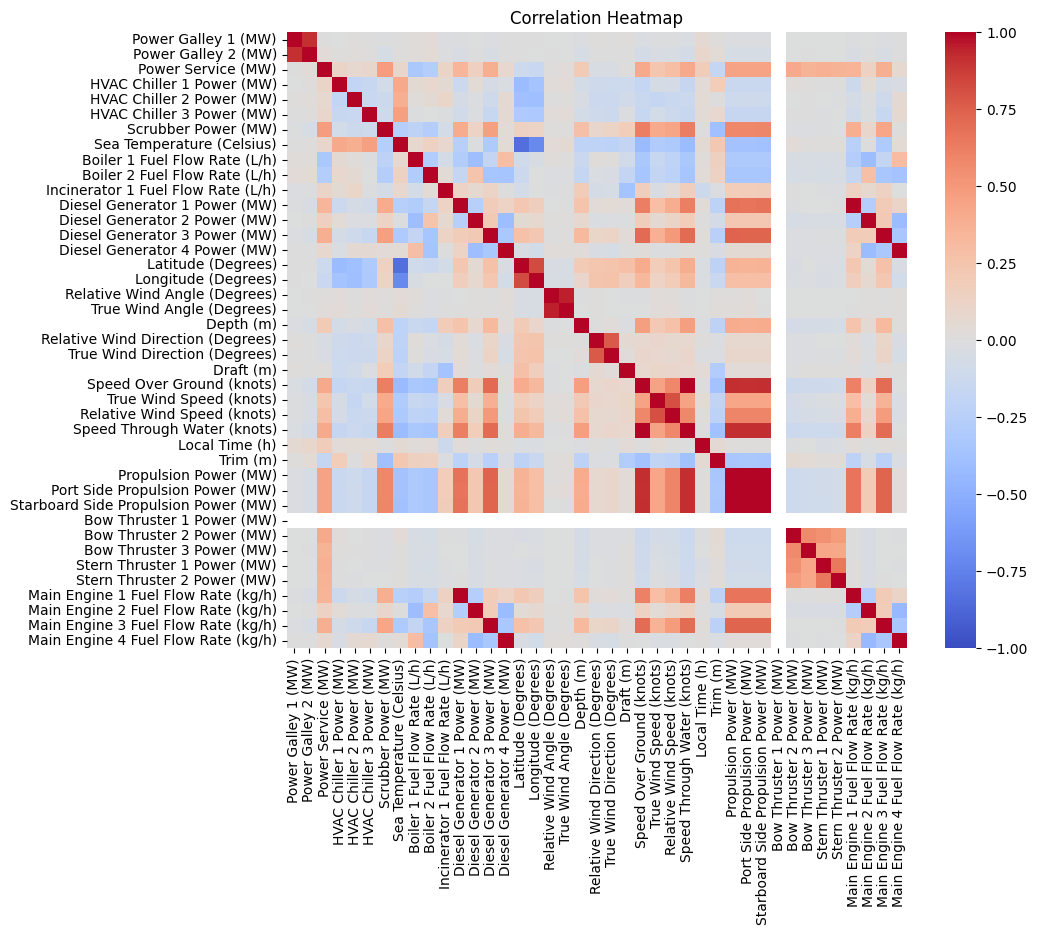

In [ ]:
# Heatmap from column-wise correlation

plt.figure(figsize=(10, 8))
sns.heatmap(df_correlation, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Main insights from heatmap:


*   Main Engines are the primary energy source of the corresponding Diesel Generators
*   Fuel flow rate is correlated mainly with Propulsion Power, but also with Power Service and Scrubber Power.
*   Logically Propulsion Power is strongly correlated with Vessel Speed, both relative to ground and to the water.
*   Logically Propulsion Power is also correlated with the Wind Speed.
*   There are positive correlation between the Vessel Location and the Weather. And also wiht the Vessel Operation. This indicates that the operational conditions are relatively constant at certain location.
*   The correlation slighty higher correlation between scrubber power (MW) and the fuel flow rate of engines 1 and 3 than the correlation with engines 2 and 4. This could indicates that engines 1 and 3 have a different regime or purpose than engines 2 and 4.



## Histogram of speed

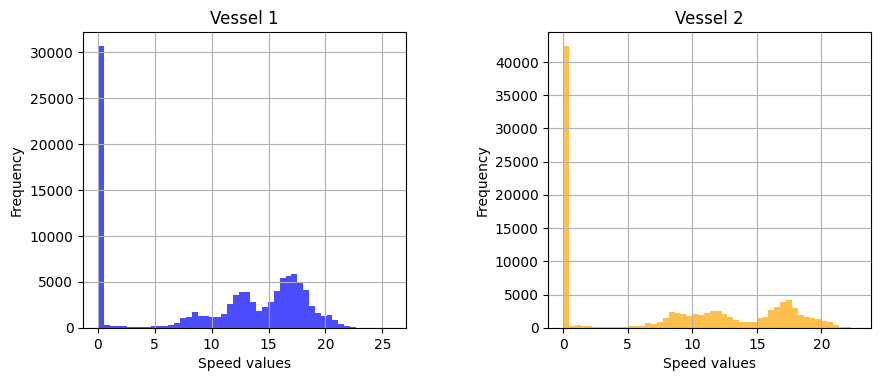

In [ ]:
# Splitting DataFrame for each vessel

data_vessel1 = data[data['Vessel Name'] == 'Vessel 1']
data_vessel2 = data[data['Vessel Name'] == 'Vessel 2']

# Extracting speeds
x1 = data_vessel1['Speed Over Ground (knots)'].values
x2 = data_vessel2['Speed Over Ground (knots)'].values


# Plot histogram
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,5))

ax1, ax2 = axes

n_1, bins_1, patches_1 = ax1.hist(x1, bins=50, color='blue', alpha=0.7)

n_2, bins_2, patches_2 = ax2.hist(x2, bins=50, color='orange', alpha=0.7)

ax1.set_title('Vessel 1')
ax1.set_xlabel('Speed values (knots)')
ax1.set_ylabel('Frequency')
ax1.grid()

ax2.set_title('Vessel 2')
ax2.set_xlabel('Speed values (knots)')
ax2.set_ylabel('Frequency')
ax2.grid()


plt.tight_layout(pad=5)

plt.show()

In [ ]:
print(f"Vessel 1: \t Bin 1: Range ({bins_1[0]}, {bins_1[1]}), Count: {n_1[0]}")
print(f"Vessel 2: \t Bin 1: Range ({bins_2[0]}, {bins_2[1]}), Count: {n_2[0]}")

print("% of operating time without navigation")
print(f"Vessel 1: {100*n_1[0]/sum(n_1[1:]):.1f}")
print(f"Vessel 2: {100*n_2[0]/sum(n_2[1:]):.1f}")

Vessel 1: 	 Bin 1: Range (0.0, 0.5154), Count: 30648.0
Vessel 2: 	 Bin 1: Range (0.0, 0.4542), Count: 42356.0
% of operating time without navigation
Vessel 1: 41.2
Vessel 2: 68.5


Insights from Histrograms:

*   Vessel 1 stays in stationary condition (e.g. in the port) approx. 40% of the time.
*   Vessel 2 stays in stationary condition (e.g. in the port) approx. 70% of the time.



## Power distribution vs speed

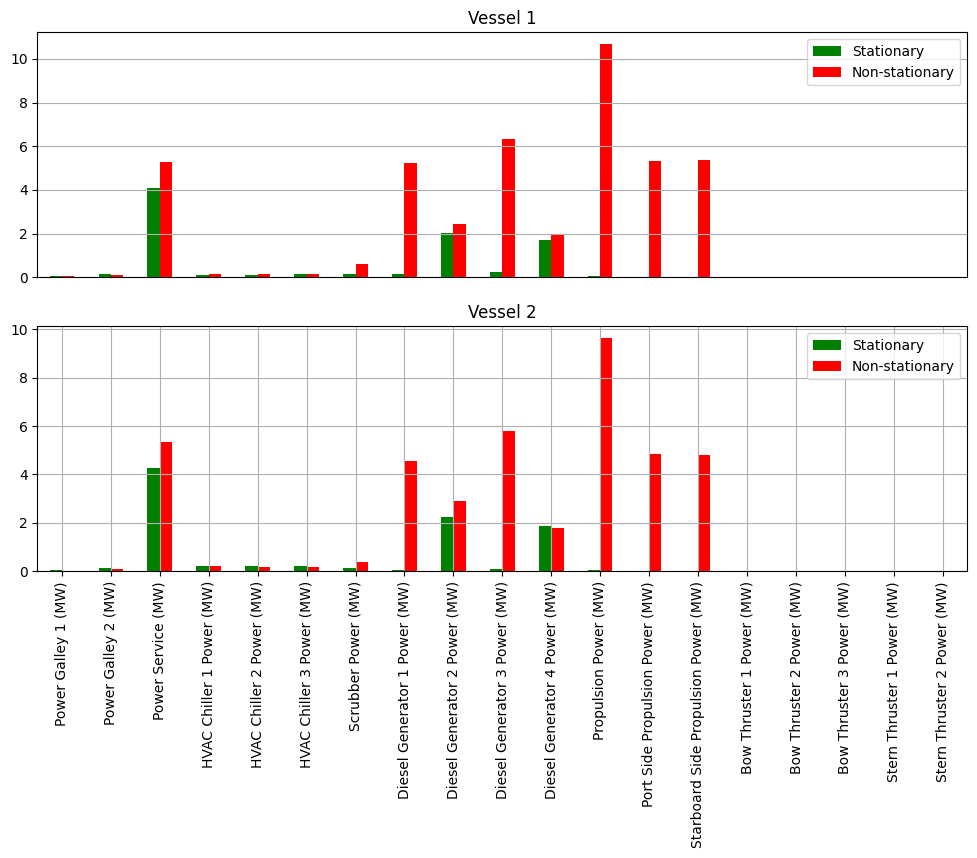

In [ ]:
# Splitting DataFrame for each vessel
data_vessel1 = data[data['Vessel Name'] == 'Vessel 1']
data_vessel2 = data[data['Vessel Name'] == 'Vessel 2']

# Splitting DataFrame for each speed regime

threshold_speed = 0.1 # Speed (knots) limit between the two operational regimes

data_vessel1_stationary = data_vessel1[data_vessel1['Speed Over Ground (knots)'] < threshold_speed]
data_vessel2_stationary = data_vessel2[data_vessel2['Speed Over Ground (knots)'] < threshold_speed]

data_vessel1_nonstationary = data_vessel1[data_vessel1['Speed Over Ground (knots)'] > threshold_speed]
data_vessel2_nonstationary = data_vessel2[data_vessel2['Speed Over Ground (knots)'] > threshold_speed]

data_vessel1_stationary_MW = data_vessel1_stationary.filter(like='(MW)').mean()
data_vessel2_stationary_MW = data_vessel2_stationary.filter(like='(MW)').mean()

data_vessel1_nonstationary_MW = data_vessel1_nonstationary.filter(like='(MW)').mean()
data_vessel2_nonstationary_MW = data_vessel2_nonstationary.filter(like='(MW)').mean()

data_vessel1_MW = pd.concat([data_vessel1_stationary_MW, data_vessel1_nonstationary_MW], axis=1, keys=['Stationary', 'Non-stationary'])
data_vessel2_MW = pd.concat([data_vessel2_stationary_MW, data_vessel2_nonstationary_MW], axis=1, keys=['Stationary', 'Non-stationary'])

fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(12,7))

ax1, ax2 = axes

data_vessel1_MW.plot.bar(color=['green', 'red'], ax=ax1, title='Vessel 1', grid=True)
data_vessel2_MW.plot.bar(color=['green', 'red'], ax=ax2, title='Vessel 2', grid=True)

ax1.xaxis.set_ticks([])

plt.show()

Main insights:

*   The Power consumption (in MW) **not** related to the propulsion is relatively constant between the stationary and non-stationary situation of the vessel.
*   There is a small increase in the Power Service consumption when the vessel is moving. This indicates that the Vessel does not operate to full capacity when it is not moving.
*   Generator 1 and 3 operates mainly during the non-stationary operation of the Vessel. This indicates that these 2 generators are used mainly for propulsion.
*   The power consumption from the thrusters, used for the vessel maneuverability, is insignificant.


## Power consumption vs power generation

### Vessel 1

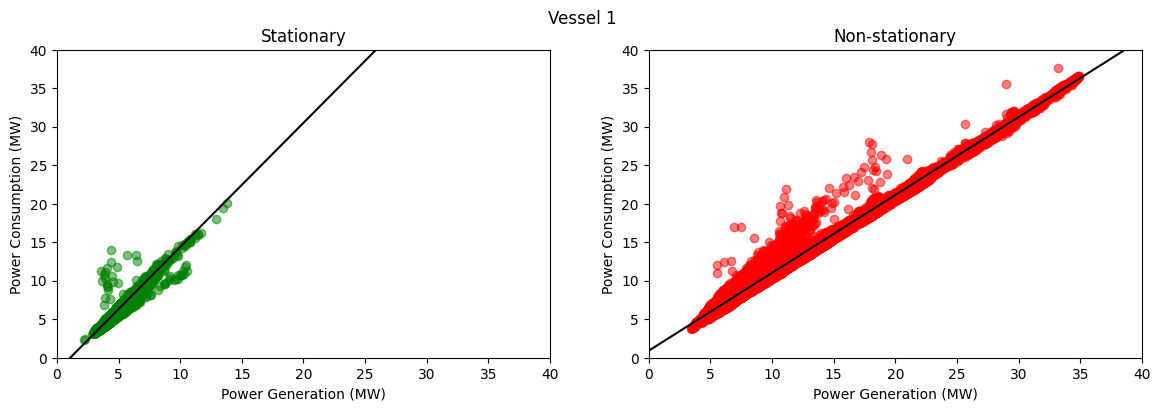

In [ ]:
data_vessel1 = data[data['Vessel Name'] == 'Vessel 1'].dropna()

threshold_speed = 0.1 # Speed (knots) limit between the two operational regimes

data_vessel1_stationary = data_vessel1[data_vessel1['Speed Over Ground (knots)'] < threshold_speed]
data_vessel1_nonstationary = data_vessel1[data_vessel1['Speed Over Ground (knots)'] > threshold_speed]

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,4))

fig.suptitle('Vessel 1')

ax1, ax2 = axes

# Coefficients of linear function
slopes = list()
intercepts = list()

# Stationary

ax1.set_title('Stationary')
ax1.set_xlabel('Power Generation (MW)')
ax1.set_ylabel('Power Consumption (MW)')
ax1.set_ylim(0, 40)
ax1.set_xlim(0, 40)

# Energy generation
x = data_vessel1_stationary['Diesel Generator 1 Power (MW)'].values
x += data_vessel1_stationary['Diesel Generator 2 Power (MW)'].values
x += data_vessel1_stationary['Diesel Generator 3 Power (MW)'].values
x += data_vessel1_stationary['Diesel Generator 4 Power (MW)'].values

# Energy consumption
y = data_vessel1_stationary['Power Galley 1 (MW)'].values
y += data_vessel1_stationary['Power Galley 2 (MW)'].values
y += data_vessel1_stationary['Power Service (MW)'].values
y += data_vessel1_stationary['HVAC Chiller 1 Power (MW)'].values
y += data_vessel1_stationary['HVAC Chiller 2 Power (MW)'].values
y += data_vessel1_stationary['HVAC Chiller 3 Power (MW)'].values
y += data_vessel1_stationary['Scrubber Power (MW)'].values
y += data_vessel1_stationary['Propulsion Power (MW)'].values
y += data_vessel1_stationary['Bow Thruster 1 Power (MW)'].values
y += data_vessel1_stationary['Bow Thruster 2 Power (MW)'].values
y += data_vessel1_stationary['Bow Thruster 3 Power (MW)'].values
y += data_vessel1_stationary['Stern Thruster 1 Power (MW)'].values
y += data_vessel1_stationary['Stern Thruster 2 Power (MW)'].values

ax1.scatter(x=x, y=y, color='green', alpha=0.5)

# Linear regression of power consumption in stationary regime
indices = np.random.choice(len(x), size=1000, replace=False)
slope, intercept = np.polyfit(x[indices], y[indices], 1)
intercepts.append(intercept)
slopes.append(slope)
x_values = np.linspace(0, 40, 10)
y_values = slope * x_values + intercept
ax1.plot(x_values, y_values, color='black')

# Non-stationary

ax2.set_title('Non-stationary')
ax2.set_xlabel('Power Generation (MW)')
ax2.set_ylabel('Power Consumption (MW)')
ax2.set_ylim(0, 40)
ax2.set_xlim(0, 40)

# Energy generation
x = data_vessel1_nonstationary['Diesel Generator 1 Power (MW)'].values
x += data_vessel1_nonstationary['Diesel Generator 2 Power (MW)'].values
x += data_vessel1_nonstationary['Diesel Generator 3 Power (MW)'].values
x += data_vessel1_nonstationary['Diesel Generator 4 Power (MW)'].values

# Energy consumption
y = data_vessel1_nonstationary['Power Galley 1 (MW)'].values
y += data_vessel1_nonstationary['Power Galley 2 (MW)'].values
y += data_vessel1_nonstationary['Power Service (MW)'].values
y += data_vessel1_nonstationary['HVAC Chiller 1 Power (MW)'].values
y += data_vessel1_nonstationary['HVAC Chiller 2 Power (MW)'].values
y += data_vessel1_nonstationary['HVAC Chiller 3 Power (MW)'].values
y += data_vessel1_nonstationary['Scrubber Power (MW)'].values
y += data_vessel1_nonstationary['Propulsion Power (MW)'].values
y += data_vessel1_nonstationary['Bow Thruster 1 Power (MW)'].values
y += data_vessel1_nonstationary['Bow Thruster 2 Power (MW)'].values
y += data_vessel1_nonstationary['Bow Thruster 3 Power (MW)'].values
y += data_vessel1_nonstationary['Stern Thruster 1 Power (MW)'].values
y += data_vessel1_nonstationary['Stern Thruster 2 Power (MW)'].values

ax2.scatter(x=x, y=y, color='red', alpha=0.5)

# Linear regression of power consumption in non-stationary regime
indices = np.random.choice(len(x), size=1000, replace=False)
slope, intercept = np.polyfit(x[indices], y[indices], 1)
intercepts.append(intercept)
slopes.append(slope)
x_values = np.linspace(0, 40, 10)
y_values = slope * x_values + intercept
ax2.plot(x_values, y_values, color='black')

plt.show()

In [ ]:
print("Consumption(Generation) function for vessel 1")
print(f'Stationary: slope: {slopes[0]:.2f}, intercept: {intercepts[0]:.2f}')
print(f'Non-stationary: slope: {slopes[1]:.2f}, intercept: {intercepts[1]:.2f}')

Consumption(Generation) function for vessel 1
Stationary: slope: 1.51, intercept: -1.34
Non-stationary: slope: 1.01, intercept: 0.88


### Vessel 2

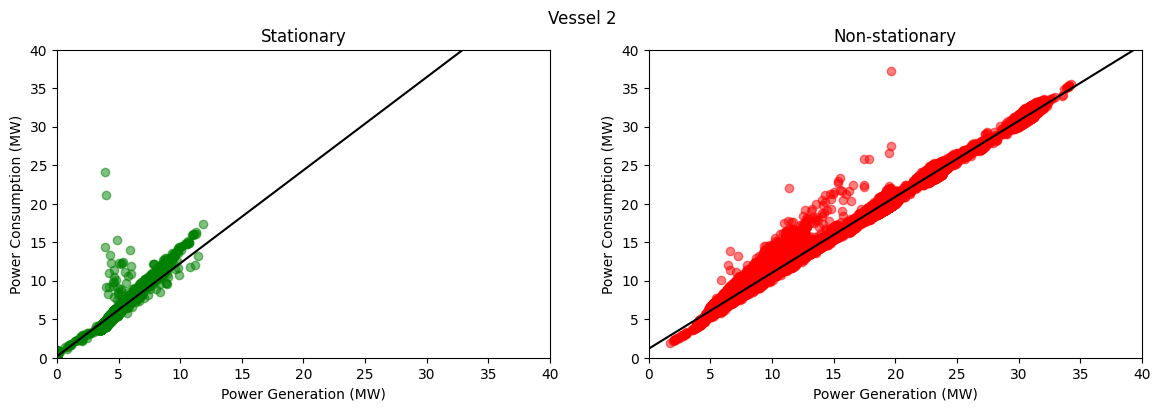

In [ ]:
data_vessel2 = data[data['Vessel Name'] == 'Vessel 2'].dropna()

threshold_speed = 0.1 # Speed (knots) limit between the two operational regimes

data_vessel2_stationary = data_vessel2[data_vessel2['Speed Over Ground (knots)'] < threshold_speed]
data_vessel2_nonstationary = data_vessel2[data_vessel2['Speed Over Ground (knots)'] > threshold_speed]

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,4))

fig.suptitle('Vessel 2')

ax1, ax2 = axes

# Coefficients of linear function
slopes = list()
intercepts = list()

# Stationary

ax1.set_title('Stationary')
ax1.set_xlabel('Power Generation (MW)')
ax1.set_ylabel('Power Consumption (MW)')
ax1.set_ylim(0, 40)
ax1.set_xlim(0, 40)

# Energy generation
x = data_vessel2_stationary['Diesel Generator 1 Power (MW)'].values
x += data_vessel2_stationary['Diesel Generator 2 Power (MW)'].values
x += data_vessel2_stationary['Diesel Generator 3 Power (MW)'].values
x += data_vessel2_stationary['Diesel Generator 4 Power (MW)'].values

# Energy consumption
y = data_vessel2_stationary['Power Galley 1 (MW)'].values
y += data_vessel2_stationary['Power Galley 2 (MW)'].values
y += data_vessel2_stationary['Power Service (MW)'].values
y += data_vessel2_stationary['HVAC Chiller 1 Power (MW)'].values
y += data_vessel2_stationary['HVAC Chiller 2 Power (MW)'].values
y += data_vessel2_stationary['HVAC Chiller 3 Power (MW)'].values
y += data_vessel2_stationary['Scrubber Power (MW)'].values
y += data_vessel2_stationary['Propulsion Power (MW)'].values
y += data_vessel2_stationary['Bow Thruster 1 Power (MW)'].values
y += data_vessel2_stationary['Bow Thruster 2 Power (MW)'].values
y += data_vessel2_stationary['Bow Thruster 3 Power (MW)'].values
y += data_vessel2_stationary['Stern Thruster 1 Power (MW)'].values
y += data_vessel2_stationary['Stern Thruster 2 Power (MW)'].values

ax1.scatter(x=x, y=y, color='green', alpha=0.5)

# Linear regression of power consumption in stationary regime
indices = np.random.choice(len(x), size=1000, replace=False)
slope, intercept = np.polyfit(x[indices], y[indices], 1)
intercepts.append(intercept)
slopes.append(slope)
x_values = np.linspace(0, 40, 10)
y_values = slope * x_values + intercept
ax1.plot(x_values, y_values, color='black')

# Non-stationary

ax2.set_title('Non-stationary')
ax2.set_xlabel('Power Generation (MW)')
ax2.set_ylabel('Power Consumption (MW)')
ax2.set_ylim(0, 40)
ax2.set_xlim(0, 40)

# Energy generation
x = data_vessel2_nonstationary['Diesel Generator 1 Power (MW)'].values
x += data_vessel2_nonstationary['Diesel Generator 2 Power (MW)'].values
x += data_vessel2_nonstationary['Diesel Generator 3 Power (MW)'].values
x += data_vessel2_nonstationary['Diesel Generator 4 Power (MW)'].values

# Energy consumption
y = data_vessel2_nonstationary['Power Galley 1 (MW)'].values
y += data_vessel2_nonstationary['Power Galley 2 (MW)'].values
y += data_vessel2_nonstationary['Power Service (MW)'].values
y += data_vessel2_nonstationary['HVAC Chiller 1 Power (MW)'].values
y += data_vessel2_nonstationary['HVAC Chiller 2 Power (MW)'].values
y += data_vessel2_nonstationary['HVAC Chiller 3 Power (MW)'].values
y += data_vessel2_nonstationary['Scrubber Power (MW)'].values
y += data_vessel2_nonstationary['Propulsion Power (MW)'].values
y += data_vessel2_nonstationary['Bow Thruster 1 Power (MW)'].values
y += data_vessel2_nonstationary['Bow Thruster 2 Power (MW)'].values
y += data_vessel2_nonstationary['Bow Thruster 3 Power (MW)'].values
y += data_vessel2_nonstationary['Stern Thruster 1 Power (MW)'].values
y += data_vessel2_nonstationary['Stern Thruster 2 Power (MW)'].values

ax2.scatter(x=x, y=y, color='red', alpha=0.5)

# Linear regression of power consumption in non-stationary regime
indices = np.random.choice(len(x), size=1000, replace=False)
slope, intercept = np.polyfit(x[indices], y[indices], 1)
intercepts.append(intercept)
slopes.append(slope)
x_values = np.linspace(0, 40, 10)
y_values = slope * x_values + intercept
ax2.plot(x_values, y_values, color='black')

plt.show()

In [ ]:
print("Consumption(Generation) function for vessel 2")
print(f'Stationary: slope: {slopes[0]:.2f}, intercept: {intercepts[0]:.2f}')
print(f'Non-stationary: slope: {slopes[1]:.2f}, intercept: {intercepts[1]:.2f}')

Consumption(Generation) function for vessel 2
Stationary: slope: 1.25, intercept: -0.09
Non-stationary: slope: 0.98, intercept: 1.16


Insights:

*   Power Consumption (MW) > Power Generation (MW) $\Rightarrow$ There is a second source of power (MW) not listed
*   Vessel 2 consumes less power (MW) for generated unit (MW)

## Fuel consumption

Fuel Consumption Efficiency (FCE)

$$
\text{FCE} = \frac{\text{Fuel Flow Rate (kg/h)}}{\text{Generated Engine Power (MW)}}
$$

### Vessel 1

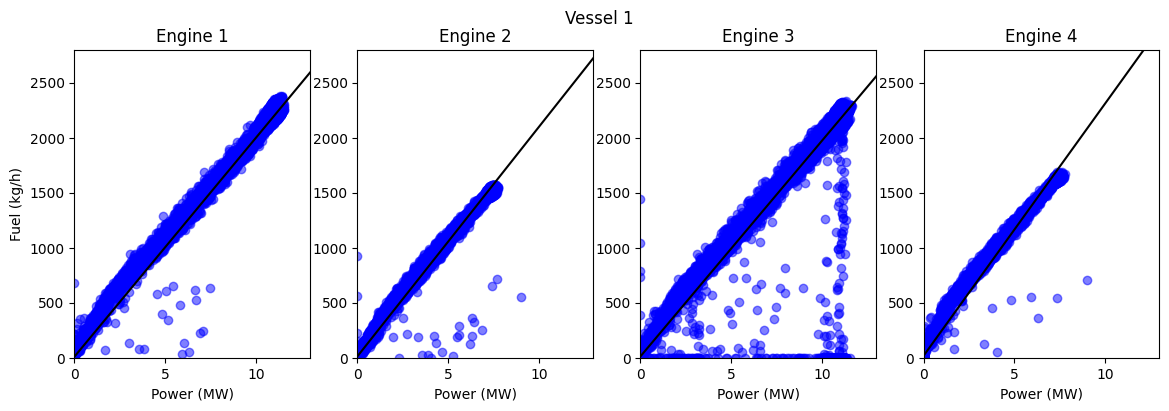

In [ ]:
data_vessel1 = data[data['Vessel Name'] == 'Vessel 1'].dropna()

fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(14,4))

fig.suptitle('Vessel 1')

ax1, ax2, ax3, ax4 = axes

# Coefficients of linear function
slopes = list()
intercepts = list()

# Generator 1

x = data_vessel1['Diesel Generator 1 Power (MW)'].values
y = data_vessel1['Main Engine 1 Fuel Flow Rate (kg/h)'].values

ax1.scatter(x=x, y=y, color='blue', alpha=0.5)
ax1.set_title('Engine 1')
ax1.set_xlabel('Power (MW)')
ax1.set_ylabel('Fuel consumption (kg/h)')
ax1.set_ylim(0, 2800)
ax1.set_xlim(0, 13)

# Linear regression of fuel consumption for generator 1
indices = np.random.choice(len(x), size=1000, replace=False)
slope, intercept = np.polyfit(x[indices], y[indices], 1)
intercepts.append(intercept)
slopes.append(slope)
x_values = np.linspace(0, 13, 10)
y_values = slope * x_values + intercept
ax1.plot(x_values, y_values, color='black')

# Generator 2

x = data_vessel1['Diesel Generator 2 Power (MW)'].values
y = data_vessel1['Main Engine 2 Fuel Flow Rate (kg/h)'].values

ax2.scatter(x=x, y=y, color='blue', alpha=0.5)
ax2.set_title('Engine 2')
ax2.set_xlabel('Power (MW)')
ax2.set_ylim(0, 2800)
ax2.set_xlim(0, 13)

# Linear regression of fuel consumption for generator 2
slope, intercept = np.polyfit(x[indices], y[indices], 1)
intercepts.append(intercept)
slopes.append(slope)
x_values = np.linspace(0, 13, 10)
y_values = slope * x_values + intercept
ax2.plot(x_values, y_values, color='black')

# Generator 3

x = data_vessel1['Diesel Generator 3 Power (MW)'].values
y = data_vessel1['Main Engine 3 Fuel Flow Rate (kg/h)'].values

ax3.scatter(x=x, y=y, color='blue', alpha=0.5)
ax3.set_title('Engine 3')
ax3.set_xlabel('Power (MW)')
ax3.set_ylim(0, 2800)
ax3.set_xlim(0, 13)

# Linear regression of fuel consumption for generator 3
slope, intercept = np.polyfit(x[indices], y[indices], 1)
intercepts.append(intercept)
slopes.append(slope)
x_values = np.linspace(0, 13, 10)
y_values = slope * x_values + intercept
ax3.plot(x_values, y_values, color='black')

# Generator 4

x = data_vessel1['Diesel Generator 4 Power (MW)'].values
y = data_vessel1['Main Engine 4 Fuel Flow Rate (kg/h)'].values

ax4.scatter(x=x, y=y, color='blue', alpha=0.5)
ax4.set_title('Engine 4')
ax4.set_xlabel('Power (MW)')
ax4.set_ylim(0, 2800)
ax4.set_xlim(0, 13)

# Linear regression of fuel consumption for generator 4
slope, intercept = np.polyfit(x[indices], y[indices], 1)
intercepts.append(intercept)
slopes.append(slope)
x_values = np.linspace(0, 13, 10)
y_values = slope * x_values + intercept
ax4.plot(x_values, y_values, color='black')

plt.show()

In [ ]:
print("Fuel(power) function for vessel 1")
for idx, (slope, intercept) in enumerate(zip(slopes, intercepts)):
  print(f'Engine {idx+1}: slope: {slope:.2f}, intercept: {intercept:.2f}')

print(f"FCE: {sum(slopes)/len(slopes):.2f}")

Fuel(power) function for vessel 1
Engine 1: slope: 198.93, intercept: 9.24
Engine 2: slope: 208.53, intercept: 12.95
Engine 3: slope: 195.95, intercept: 12.77
Engine 4: slope: 229.16, intercept: 17.15
FCE: 208.14


### Vessel 2

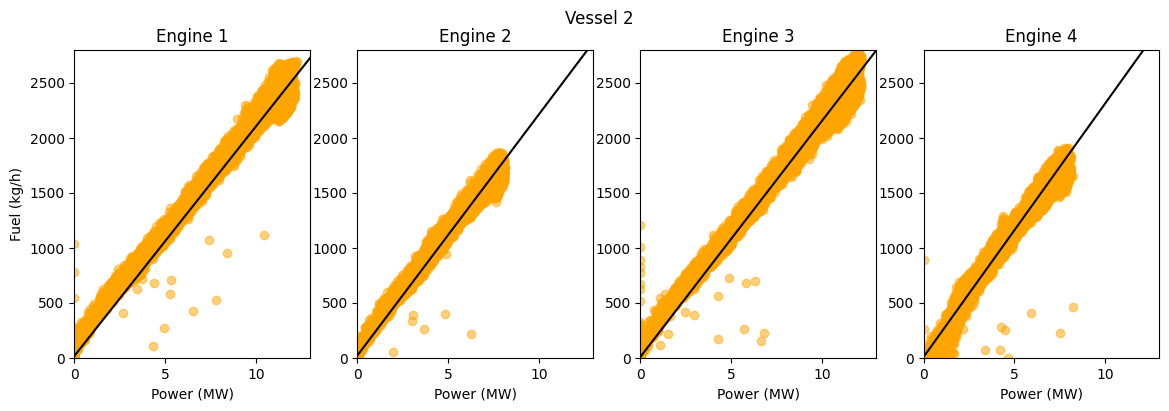

In [ ]:

data_vessel2 = data[data['Vessel Name'] == 'Vessel 2'].dropna()

fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(14,4))

fig.suptitle('Vessel 2')

ax1, ax2, ax3, ax4 = axes

# Coefficients of linear function
slopes = list()
intercepts = list()

# Generator 1

x = data_vessel2['Diesel Generator 1 Power (MW)'].values
y = data_vessel2['Main Engine 1 Fuel Flow Rate (kg/h)'].values

ax1.scatter(x=x, y=y, color='orange', alpha=0.5)
ax1.set_title('Engine 1')
ax1.set_xlabel('Power (MW)')
ax1.set_ylabel('Fuel consumption (kg/h)')
ax1.set_ylim(0, 2800)
ax1.set_xlim(0, 13)

# Linear regression of fuel consumption for generator 1
indices = np.random.choice(len(x), size=1000, replace=False)
slope, intercept = np.polyfit(x[indices], y[indices], 1)
intercepts.append(intercept)
slopes.append(slope)
x_values = np.linspace(0, 13, 10)
y_values = slope * x_values + intercept
ax1.plot(x_values, y_values, color='black')


# Generator 2

x = data_vessel2['Diesel Generator 2 Power (MW)'].values
y = data_vessel2['Main Engine 2 Fuel Flow Rate (kg/h)'].values

ax2.scatter(x=x, y=y, color='orange', alpha=0.5)
ax2.set_title('Engine 2')
ax2.set_xlabel('Power (MW)')
ax2.set_ylim(0, 2800)
ax2.set_xlim(0, 13)

# Linear regression of fuel consumption for generator 2
indices = np.random.choice(len(x), size=1000, replace=False)
slope, intercept = np.polyfit(x[indices], y[indices], 1)
intercepts.append(intercept)
slopes.append(slope)
x_values = np.linspace(0, 13, 10)
y_values = slope * x_values + intercept
ax2.plot(x_values, y_values, color='black')

# Generator 3

x = data_vessel2['Diesel Generator 3 Power (MW)'].values
y = data_vessel2['Main Engine 3 Fuel Flow Rate (kg/h)'].values

ax3.scatter(x=x, y=y, color='orange', alpha=0.5)
ax3.set_title('Engine 3')
ax3.set_xlabel('Power (MW)')
ax3.set_ylim(0, 2800)
ax3.set_xlim(0, 13)

# Linear regression of fuel consumption for generator 3
indices = np.random.choice(len(x), size=1000, replace=False)
slope, intercept = np.polyfit(x[indices], y[indices], 1)
intercepts.append(intercept)
slopes.append(slope)
x_values = np.linspace(0, 13, 10)
y_values = slope * x_values + intercept
ax3.plot(x_values, y_values, color='black')

# Generator 4

x = data_vessel2['Diesel Generator 4 Power (MW)'].values
y = data_vessel2['Main Engine 4 Fuel Flow Rate (kg/h)'].values

ax4.scatter(x=x, y=y, color='orange', alpha=0.5)
ax4.set_title('Engine 4')
ax4.set_xlabel('Power (MW)')
ax4.set_ylim(0, 2800)
ax4.set_xlim(0, 13)

# Linear regression of fuel consumption for generator 4
indices = np.random.choice(len(x), size=1000, replace=False)
slope, intercept = np.polyfit(x[indices], y[indices], 1)
intercepts.append(intercept)
slopes.append(slope)
x_values = np.linspace(0, 13, 10)
y_values = slope * x_values + intercept
ax4.plot(x_values, y_values, color='black')


plt.show()

In [ ]:
print("Fuel(power) function for vessel 2 per engine")
for idx, (slope, intercept) in enumerate(zip(slopes, intercepts)):
  print(f'Engine {idx+1}: slope: {slope:.2f}, intercept: {intercept:.2f}')

print(f"FCE: {sum(slopes)/len(slopes):.2f}")

Fuel(power) function for vessel 2
Engine 1: slope: 208.16, intercept: 16.82
Engine 2: slope: 218.47, intercept: 23.10
Engine 3: slope: 214.96, intercept: 9.33
Engine 4: slope: 227.99, intercept: 5.78
FCE: 217.40


Insights:

*   The average fuel consumption (FCE) per MW of power for the diesel generators of vessel 2 is higher than that of vessel 1. Therefore, on average, the diesel generators of vessel 1 are more efficient than those of vessel 2.
*   The Fuel Consumption (SFC) of marine engines ranges between 155 and 225 g/kWh on optimal load settings [[reference](https://www.sustainable-ships.org/stories/2022/sfc)], which is the case for all the diesel engines, for both vessels.

Fuel Efficiency (Voyage-Based)

\begin{align*}
\text{Fuel Efficiency} &= \frac{\text{Distance Travelled (nm)}}{\text{Fuel Consumption for propulsion (kg)}} \\
&= \frac{\text{Speed (knots)}}{\text{Fuel Flow Rate for propulsion (kg/h)}} \\
&= \frac{\text{Speed (knots)}}{\text{Fuel Flow Rate (kg/h)} \times \text{% propulsion}}
\end{align*}

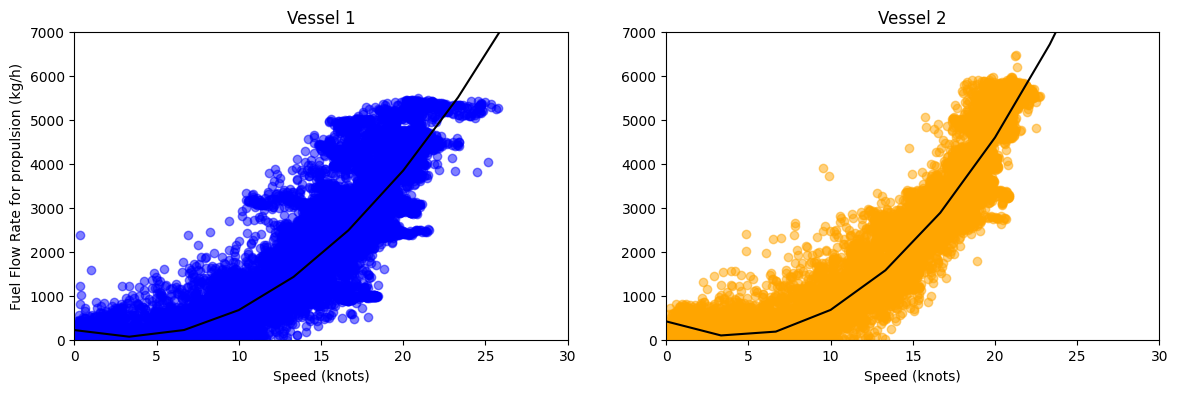

In [14]:
data_vessel1 = data[data['Vessel Name'] == 'Vessel 1']
data_vessel2 = data[data['Vessel Name'] == 'Vessel 2']

threshold_speed = 0.1 # Speed (knots) limit between the two operational regimes

data_vessel1_nonstationary = data_vessel1[data_vessel1['Speed Over Ground (knots)'] > threshold_speed].dropna()
data_vessel2_nonstationary = data_vessel2[data_vessel2['Speed Over Ground (knots)'] > threshold_speed].dropna()

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,4))

ax1, ax2 = axes

# Coefficients of quadratic function
A = list()
B = list()
C = list()

# Energy consumption
z = data_vessel1_nonstationary['Power Galley 1 (MW)'].values
z += data_vessel1_nonstationary['Power Galley 2 (MW)'].values
z += data_vessel1_nonstationary['Power Service (MW)'].values
z += data_vessel1_nonstationary['HVAC Chiller 1 Power (MW)'].values
z += data_vessel1_nonstationary['HVAC Chiller 2 Power (MW)'].values
z += data_vessel1_nonstationary['HVAC Chiller 3 Power (MW)'].values
z += data_vessel1_nonstationary['Scrubber Power (MW)'].values
z += data_vessel1_nonstationary['Propulsion Power (MW)'].values
z += data_vessel1_nonstationary['Bow Thruster 1 Power (MW)'].values
z += data_vessel1_nonstationary['Bow Thruster 2 Power (MW)'].values
z += data_vessel1_nonstationary['Bow Thruster 3 Power (MW)'].values
z += data_vessel1_nonstationary['Stern Thruster 1 Power (MW)'].values
z += data_vessel1_nonstationary['Stern Thruster 2 Power (MW)'].values

#% propulsion
# percentage of the power consumption utilized for propulsion
p = data_vessel1_nonstationary['Propulsion Power (MW)'].values /z

# Fuel consumption for generation
y = data_vessel1_nonstationary['Main Engine 1 Fuel Flow Rate (kg/h)'].values
y += data_vessel1_nonstationary['Main Engine 2 Fuel Flow Rate (kg/h)'].values
y += data_vessel1_nonstationary['Main Engine 3 Fuel Flow Rate (kg/h)'].values
y += data_vessel1_nonstationary['Main Engine 4 Fuel Flow Rate (kg/h)'].values

# percentage of the fuel consumption utilized for propulsion
y = y * p

# Speed
x = data_vessel1_nonstationary['Speed Over Ground (knots)'].values

ax1.scatter(x=x, y=y, color='blue', alpha=0.5)
ax1.set_title('Vessel 1')
ax1.set_xlabel('Speed (knots)')
ax1.set_ylabel('Fuel Flow Rate for propulsion (kg/h)')
ax1.set_ylim(0, 7000)
ax1.set_xlim(0, 30)

# Polinomial regression of speed
indices = np.random.choice(len(x), size=1000, replace=False)
a, b, c = np.polyfit(x[indices], y[indices], 2)
A.append(a)
B.append(b)
C.append(c)
x_values = np.linspace(0, 30, 10)
y_values = a * x_values**2 + b * x_values + c
ax1.plot(x_values, y_values, color='black')

# Energy consumption
z = data_vessel2_nonstationary['Power Galley 1 (MW)'].values
z += data_vessel2_nonstationary['Power Galley 2 (MW)'].values
z += data_vessel2_nonstationary['Power Service (MW)'].values
z += data_vessel2_nonstationary['HVAC Chiller 1 Power (MW)'].values
z += data_vessel2_nonstationary['HVAC Chiller 2 Power (MW)'].values
z += data_vessel2_nonstationary['HVAC Chiller 3 Power (MW)'].values
z += data_vessel2_nonstationary['Scrubber Power (MW)'].values
z += data_vessel2_nonstationary['Propulsion Power (MW)'].values
z += data_vessel2_nonstationary['Bow Thruster 1 Power (MW)'].values
z += data_vessel2_nonstationary['Bow Thruster 2 Power (MW)'].values
z += data_vessel2_nonstationary['Bow Thruster 3 Power (MW)'].values
z += data_vessel2_nonstationary['Stern Thruster 1 Power (MW)'].values
z += data_vessel2_nonstationary['Stern Thruster 2 Power (MW)'].values

#% propulsion
p = data_vessel2_nonstationary['Propulsion Power (MW)'].values /z


# Fuel consumption for generation
y = data_vessel2_nonstationary['Main Engine 1 Fuel Flow Rate (kg/h)'].values
y += data_vessel2_nonstationary['Main Engine 2 Fuel Flow Rate (kg/h)'].values
y += data_vessel2_nonstationary['Main Engine 3 Fuel Flow Rate (kg/h)'].values
y += data_vessel2_nonstationary['Main Engine 4 Fuel Flow Rate (kg/h)'].values

y = y * p

# Speed
x = data_vessel2_nonstationary['Speed Over Ground (knots)'].values

ax2.scatter(x=x, y=y, color='orange', alpha=0.5)
ax2.set_title('Vessel 2')
ax2.set_xlabel('Speed (knots)')
ax2.set_ylim(0, 7000)
ax2.set_xlim(0, 30)

indices = np.random.choice(len(x), size=1000, replace=False)
a, b, c = np.polyfit(x[indices], y[indices], 2)
A.append(a)
B.append(b)
C.append(c)
x_values = np.linspace(0, 30, 10)
y_values = a * x_values**2 + b * x_values + c
ax2.plot(x_values, y_values, color='black')

plt.show()

In [16]:
print("Fuel(speed) function")
print(f'Vessel 1: a: {A[0]:.1f}, b: {B[0]:.1f}, c: {C[0]:.1f}')
print(f'Vessel 2: a: {A[1]:.1f}, b: {B[1]:.1f}, c: {C[0]:.1f}')

Speed(Fuel) function
Vessel 1: a: 13.6, b: -90.4, c: 218.9
Vessel 2: slope: 18.3, b: -156.7, c: 218.9


Insights:

*   Vessel 2 requires more fuel consumption than the vessel 1 to mantain a certain speed over the ground. If the tonnage of the vessels are similar, then the vessel 1 is more efficient than the vessel 2.

## Scrubber Efficiency

Exhaust Gas Cleaning Systems (EGCS), commonly referred to as “scrubber”, are used to reduce the sulphur emissions from exhausted gases from fuel combustion.

The energy consumption of OL systems is 1-3% of the engine power output (US EPA, 2011).

The energy consumption of CL systems is reported to be about 0.5-1% of the engine power output

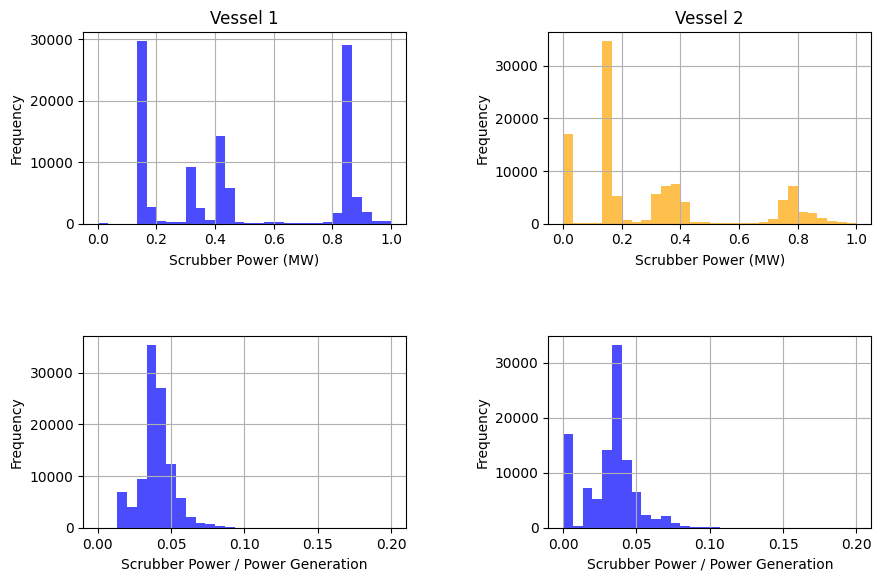

In [49]:
# Splitting DataFrame for each vessel

condition = data['Diesel Generator 1 Power (MW)'] + data['Diesel Generator 2 Power (MW)']
condition += data['Diesel Generator 3 Power (MW)'] + data['Diesel Generator 4 Power (MW)'] > 0

data_vessel1 = data[(data['Vessel Name'] == 'Vessel 1') & condition]
data_vessel2 = data[(data['Vessel Name'] == 'Vessel 2') & condition]

# Plot histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))

(ax1, ax2), (ax3, ax4) = axes

x = data_vessel1['Scrubber Power (MW)'].values

n_1, bins_1, patches_1 = ax1.hist(x, bins=30, range=(0, 1), color='blue', alpha=0.7)

ax1.set_title('Vessel 1')
ax1.set_xlabel('Scrubber Power (MW)')
ax1.set_ylabel('Frequency')
ax1.grid()

x = data_vessel2['Scrubber Power (MW)'].values

n_2, bins_2, patches_2 = ax2.hist(x, bins=30, range=(0, 1), color='orange', alpha=0.7)

ax2.set_title('Vessel 2')
ax2.set_xlabel('Scrubber Power (MW)')
ax2.set_ylabel('Frequency')
ax2.grid()

# Energy generation
x = data_vessel1['Diesel Generator 1 Power (MW)'].values
x += data_vessel1['Diesel Generator 2 Power (MW)'].values
x += data_vessel1['Diesel Generator 3 Power (MW)'].values
x += data_vessel1['Diesel Generator 4 Power (MW)'].values
x = data_vessel1['Scrubber Power (MW)'].values / x

n_3, bins_3, patches_3 = ax3.hist(x, bins=30, range=(0, 0.2), color='blue', alpha=0.7)

ax3.set_xlabel('Scrubber Power / Power Generation')
ax3.set_ylabel('Frequency')
ax3.grid()


# Energy generation
x = data_vessel2['Diesel Generator 1 Power (MW)'].values
x += data_vessel2['Diesel Generator 2 Power (MW)'].values
x += data_vessel2['Diesel Generator 3 Power (MW)'].values
x += data_vessel2['Diesel Generator 4 Power (MW)'].values
x = data_vessel2['Scrubber Power (MW)'].values / x

n_4, bins_4, patches_4 = ax4.hist(x, bins=30, range=(0, 0.2), color='blue', alpha=0.7)

ax4.set_xlabel('Scrubber Power / Power Generation')
ax4.set_ylabel('Frequency')
ax4.grid()

plt.tight_layout(pad=5)

plt.show()

Insights:

*   The charts shows us tha the Scrubbers have roughly 4 modes of operation. This could depends on the operational conditions of the vessel or the quality of the burnt fuel.
*   Vessel 2 sometimes operates without Scrubber, potentially not meeting the  sulphur emissions regulations.
*   The power consumption of the scrubber represents between between 0.1 and 0.8% of the power output. These values of energy consumptions are standards in the maritime industry [[reference](https://www.umweltbundesamt.de/sites/default/files/medien/5750/publikationen/2021-05-28_texte_83-2021_sox-ships.pdf)]



## Map

In [ ]:
data_location = data[['Vessel Name', 'Latitude (Degrees)', 'Longitude (Degrees)']].dropna()

data_location_vessel1 = data_location[data_location['Vessel Name'] == 'Vessel 1']
data_location_vessel2 = data_location[data_location['Vessel Name'] == 'Vessel 2']

mymap = folium.Map(location=[0, 0], zoom_start=2)

points1 = data_location_vessel1[['Latitude (Degrees)', 'Longitude (Degrees)']].values.tolist()
points2 = data_location_vessel2[['Latitude (Degrees)', 'Longitude (Degrees)']].values.tolist()

folium.PolyLine(
    locations=points1,
    color='blue',
    weight=5,
    opacity=0.7,
    popup='Vessel 1',
).add_to(mymap)

folium.PolyLine(
    locations=points2,
    color='red',
    weight=5,
    opacity=0.7,
    popup='Vessel 2',
).add_to(mymap)


mymap

Output hidden; open in https://colab.research.google.com to view.

Insights:

*   The vessels operate mainly between the Caribbean, Morocco and northern Europe.



## Github repository

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [51]:
notebook_path = "/content/drive/MyDrive/Colab Notebooks/TUI_Cruises_task.ipynb"
token_path = "/content/drive/MyDrive/Colab Notebooks/token.txt"

In [53]:
with open(token_path, 'r') as file:
    token = file.readline().strip()

In [55]:
myusername = "LMAPcoder"
repo = "TUI-Cruises"

In [56]:
# Cloning the repository
!git clone https://{token}@github.com/{myusername}/{repo}.git

Cloning into 'TUI-Cruises'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 2), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 19.34 MiB | 11.56 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [57]:
#to change directory
%cd {repo}

/content/TUI-Cruises


In [58]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [64]:
!cp "{notebook_path}" .

In [9]:
# Adding the files to the staging area
!git add data.csv

In [11]:
# Setting up my GitHub credentials
!git config --global user.name "LMAPcoder"
!git config --global user.email "leonardoantiqui@gmail.com"

In [13]:
# Committing the changes with a message
!git commit -m "Add files via upload"

[main d362869] Add files via upload
 1 file changed, 210241 insertions(+)
 create mode 100644 data.csv


In [14]:
# Pushing the changes to GitHub
!git push origin main

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 19.24 MiB | 3.07 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
remote: warning: See https://gh.io/lfs for more information.
remote: warning: File data.csv is 61.62 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
To https://github.com/LMAPcoder/TUI-Cruises.git
   b528a0a..d362869  main -> main
